# Coursework 1 - Mathematics for Machine Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## CID: 01857554

**Colab link: https://colab.research.google.com/drive/1qphm3JFIVatQlICviYZbHUhsq8ipnUQ4#scrollTo=oiD_FK82GeqV**

***
***

## Part 1: Quickfire questions [3 points]

#### Question 1 (True risk / Empirical risk):
The true risk corresponds to the expected loss of a specific function, taken across the data distribution: The true risk is represented as $R(f)=\mathbf{E}_D[L(f(x),y)]$. \\
The empirical risk is the mean of the loss function across $N$ many data points (when the true distribution of the data is not known), which is used to estimate the true risk. It is represented as $\hat{R}(f)=\frac{1}{N}\sum_{i=1}^N[L(f(x_i),y_i)]$.

#### Question 2 ('Large' or 'rich' hypothesis class):

In the generalisation bound for a finite hypothesis class $R(f)\leq \hat{R}(f)+\sqrt{\frac{log|\mathcal{F}| + log\frac{2}{\delta}}{2N}}$, a large hypothesis set is penalised by the second term, adding more uncertainity to the true risk. However, using a large hypothesis set will help reduce $\hat{R}(f)$, allowing a better representation of the true data.


#### Question 3 (Dataset splitting):

The validation data might be very close to the training data, in which case the model might interpolate the true data very well. After all, the validation data is still part of the training data. In this case, the model might be overfitting to the validation set. This does not guarentee the performance of the model on the validation set to match that of the unseen data.

#### Question 4 (Occam’s razor):

Occan's razor is a principle that suggests that the simplest explanations are normally the correct ones, unless there is sufficient reason to say otherwise. In the case of images, a simple model will capture the basic patterns that are needed for classification. There might be slight intricacies that create variance in the data which a simple model might not pick up, but more importantly, this permits the model to not overfit and generalise well to unseen data.

#### Question 5 (Generalisation error):

For a good model, we expect the performance on an unseen dataset to have a low error, i.e. a low generalisation error. This is because we want the model to make accurate predictions on data the model has not been trained on, which means that the model should not overfit the training data, but also should not underfit the training data.

#### Question 6 (Rademacher complexity pt1):

The empirical Rademacher complexity can be written as $\mathcal{\hat{R}}_S(G)=\mathbf{E}_\sigma\left[\underset{g \in G}{\sup}\frac{1}{m}\sum_{i=1}^m\sigma_ig(z_i)\right]$. A high empirical Rademacher complexity implies that the function class $G$ correlates well with random noise on $S$ (if $\sigma_i=g(z_i)$, the value of the sum is equal to $1$ which increases the sum). Also, a high empirical Rademacher complexity describes the richness of the family of loss functions $G$, because a richer $G$ can generate more vector $\mathbf{g}$s, which on average correlates better with the noise.

If the empirical Rademacher complexity is too high, the hypothesis set $\mathcal{F}$ might be overly complex and able to capture even the noise present in the training data. This can lead to poor generalization, as the model might not differentiate between true underlying patterns and random fluctuations specific to the training set.

#### Question 7 (Rademacher complexity pt2):

 The term $log |\mathcal{F}|$ in the bound depends on the size of the hypothesis class. For larger hypothesis classes, this term can be larger, leading to a looser bound. In practice, the true complexity of the hypothesis class may not necessarily correlate with its size, and thus, this term might not accurately reflect the model's true complexity.

 The bound depends on the sample size $N$. In situations where the sample size is small, the bound may not accurately reflect the generalization performance of the learning algorithm. Moreover, the bound might not scale well with the sample size, and thus, it may not provide reliable insights in scenarios with very large or very small datasets.


#### Question 8 (Regularisation term in the loss function):

Regularisation in the loss function helps preventing the model from overfitting. In L1 and L2 regularisation, the extra regularisation term penalises large $\hat{\beta}$ values, therfore reducing the effect of noise in the data on the output, focusing the model to capture the essential patterns and trends. It also aids in adjusting to data which might portray multicolinearity, by reducing the size of the respective $\hat{\beta}$ coefficients to $0$ or close to $0$.

#### Question 9 (Momentum gradient descent):

Momentum gradient descent stores the previous gradient and then optimally redirects the direction of descent to converge quicker than standard gradient descent. It prevents the oscillatory behaviour of standard gradient descent as the minimum point approaches and offers a much smoother trajectory, making it more efficient.

#### Question 10 (Adam):

The Adam optimiser is a gradient descent algorithm that computes $m_t$ (the first moment or mean) and $v_t$ (the second moment) of the gradients of the loss function. Then it uses these two statistics to update the learning rates for different parameters. The bias-corrected first moment estimate is $\hat{m}_t=\frac{m_t}{1-\beta^t_1}$ and the bias-corrected second moment estimate is $\hat{v}_t=\frac{v_t}{1-\beta^t_2}$. The gradient descent step for parameter $\theta_t$ is then $\theta_t \leftarrow \theta_{t-1} -\alpha\frac{\hat{m}_t}{\sqrt{\hat{v}_t}+\epsilon}$.

#### Question 11 (AdaGrad):

AdaGrad is an optimisation technique that utilises the sum of squares of the gradients of each parameter and iteratively sums the previous squared sum of gradients to the last sum. The learning rate is then chosen to be $\frac{\eta}{\sqrt{accumulatedgradient_t + \epsilon}}$ which decays over iterations. Adagrad is particularly effective in settings where different parameters have vastly different update frequencies.

#### Question 12 (Decaying Learning Rate):

Decaying learning rates help improve stability because as we get closer to the minimum, the learning rate becomes very small, enabling precise updates. Also, decaying learning rates can help the optimiser escape local minima or saddle points in the loss landscape. By starting with a high learning rate that allows exploration of different regions of the landscape, the optimiser can potentially find more favorable areas that lead to better solutions. As the learning rate decreases over time, the optimiser can then converge to these regions more effectively. To avoid overstepping as we converge to the optimum, a decaying learning rate will aid in taking smaller steps to guarentee convergence.

***
***

## Part 2: Short-ish proofs [6 points]


### Question 2.1: Bounds on the risk [1 point]


1. From Hoeffding's inequality, we know that for $X_1,...,X_m$ that are independent random variables taking values in $[a_i,b_i]$ and for $S_m = \sum_{i=1}^M X_i$ , $$P(S_m - \mathbf{E}(S_m)\geq \epsilon) \leq e^{\frac{-2 \epsilon^2}{\sum_{i=1}^N{(b_i-a_i)^2}}} $$
$$P(S_m - \mathbf{E}(S_m)\leq -\epsilon) \leq e^{\frac{-2 \epsilon^2}{\sum_{i=1}^N{(b_i-a_i)^2}}} $$
Now if we let $L(f(x_i),y_i) = X_i \ \forall i$, as each $L(f(x_i),y_i)$ can be viewed as an i.i.d and the loss function is chosen to be bounded by 0 and 1. Define $\hat{R}(f) = \frac{1}{N}\sum_{i=1}^NX_i$, and then we can apply Hoeffding's inequality to obtain the corollary. Also, $\hat{R}(f)$ is an unbiased estimator of $R(f)$. Setting $\epsilon = N\epsilon$,
$$P(N\hat{R}(f)- N\mathbf{E}(\hat{R}(f))\geq N\epsilon) \leq e^{\frac{-2 (N\epsilon)^2}{\sum_{i=1}^N{(1-0)^2}}} $$
$$P(N\hat{R}(f)- N\mathbf{E}(\hat{R}(f))\leq -N\epsilon) \leq e^{\frac{-2 (N\epsilon)^2}{\sum_{i=1}^N{(1-0)^2}}} $$
because $N\hat{R}(f) = \sum_{i=1}^NX_i$. Simplifying the expressions, we get the desired corollary.
$$P(\hat{R}(f)- R(f)\geq \epsilon) \leq e^{-2N\epsilon^2} $$
Here, the probability and expectation are taken with repsect ot the sample $S$ and distribution $D^n$

2. As the sample ($N$) gets larger, the empirical risk converges to the true risks as the term $e^{-2N\epsilon^2}$ goes to $0$. If the generalisation error is decreased to a certain $\epsilon$, then increasing $N$ quadratically will give us the required bound. For example, if we want to achieve a stricter bound on $\hat{R}(f) - R(f)$ of $\frac{\epsilon}{2}$ instead of $\epsilon$, then to obtain the same probability bound as for $\epsilon$, we would need to increase $N$ by $4$.

3. Theorem 4.8 tells us that the generalisation error is bounded by the log of the size of the hypothesis class. Selecting a big hypothesis class will allow the model to fit complex data better, but it will also raise the bound, so our generalisation error could get larger. However, the use of the log function ensures that the bound goes up slower when the hypothesis becomes larger, therefore not punishing increases in large values of $|\mathcal{F}|$.

***

### Question 2.2: On semi-definiteness [1 point]

Given $ g(t) = f(x + tv) $, we know that $ f $ is convex. To prove convexity of $ g(t) $, we need to show that:

$$ g(\lambda t_1 + (1-\lambda)t_2) \leq \lambda g(t_1) + (1-\lambda)g(t_2) $$

for any $ t_1, t_2 $ in $ \mathbb{R} $ and $ \lambda $ in $[0,1]$.

Using the definition of $g$, we have:

$$ g(\lambda t_1 + (1-\lambda)t_2) = f(x + (\lambda t_1 + (1-\lambda)t_2)v) $$

$$ = f(\lambda (x + t_1 v) + (1-\lambda)(x + t_2 v)) $$

Since $f$ is convex, we have:

$$ f(\lambda x_1 + (1-\lambda)x_2) \leq \lambda f(x_1) + (1-\lambda)f(x_2) $$

Thus:

$$ g(\lambda t_1 + (1-\lambda)t_2) \leq \lambda f(x + t_1 v) + (1-\lambda)f(x + t_2 v) $$

$$ = \lambda g(t_1) + (1-\lambda)g(t_2) $$

This proves that $ g(t) $ is convex.

Given that $ f $ is twice differentiable, we can use the chain rule to find the first and second derivatives of $ g(t) $ with respect to $ t $.

$$ g'(t) = \frac{d}{dt} f(x + tv) = \nabla f(x + tv) \cdot v $$

$$ g''(t) = \frac{d^2}{dt^2} f(x + tv) = v^T \nabla^2 f(x + tv) v $$

Since $ f $ is twice differentiable, its first and second derivatives exist and are continuous, and therefore $ g(t) $ is also twice differentiable.

Thus, we have proven that $ g(t) = f(x + tv) $ is convex and twice differentiable.

Since $ g(t) = f(x + tv) $ is convex, we know that $ g''(t) $ is non-negative for all $ t $ in $ \mathbb{R} $ (by Second-Order Characterization of Convexity). This implies that $g''(0)$ is non-negative, therfore $ v^T \nabla^2 f(x) v $ is non-negative for any $ v $ in $ \mathbb{R}^n $, which in turn means that the Hessian matrix $ \nabla^2 f(x) $ is positive semi-definite.


***

### Question 2.3: A quick recap of momentum [1 point]

1. The columns of $Q$ represent the main directions of the Hessian matrix $S$ and the $\lambda_i$s represent the magnitude of curvature. This allows us to study the behaviour of the optimiser independently along each direction or principal axis, which is the best direction of minimisation. $Q^T(x_k-x^*)$ causes the original basis vectors to be shifted towards the optimum, setting the optimum to be the new origin. Additionally, the condition number is unchanged, so we do not suffer from slow convergence.

2. One potential downside is having a slower convergence rate. This is because the overall convergence rate is determined by $\lambda_1$ or $\lambda_d$. If there is a large difference in magnitude between $\lambda_1$ and $\lambda_d$, the condition number will become very small. Other downsides include the fact that $S$ may not always be symmetric and invertible.

3. In momentum gradient descent, we are going to converge to the optimum at a linear rate determined by the maximum absolute eigenvalue of R.

4. If the roots are complex, then the conjugate pair for that root will have the same real part. Therefore, as these eigenvales have the same magnitude, they will converge to the optimum at the same required rate in all the principal directions. This leads to faster convergence towards the optimum.



***

### Question 2.4: Convergence proof [3 points]

1. The evolution of Newton's gradient descent method involves iteratively updating the current solution $x_k$ using the formula:

$$x_{k+1} = x_k - (\nabla^2 f(x_k))^{-1} \nabla f(x_k)$$

Here, $ \nabla f(x_k)$ represents the gradient of the function $ f $ at the point $ x_k $, and $ \nabla^2 f(x_k) $ represents the Hessian matrix of $ f $ at the point $ x_k $. The method aims to minimize the function $ f $ by iteratively updating the solution until convergence is reached.

2. For $ f(x) = \frac{1}{2} x^T Q x + b^T x + c $, where $ x \in \mathbb{R}^d $ and $ Q $ is positive definite, Newton's method converges in a single step. This is because the gradient of $ f $ is given by $ \nabla f(x) = Qx + b $, and the Hessian matrix is $ \nabla^2 f(x) = Q $. Therefore, the update equation becomes:

$ x_{k+1} = x_k - Q^{-1} (Qx_k + b) = x_k - x_k - Q^{-1} b = - Q^{-1} b $

Thus, the solution $ x_{k+1} $ is directly obtained as $ - Q^{-1} b $ in a single step.

3. The statement asserts that if the function $ f $ is three times continuously differentiable and has a critical point $x^*$ where the gradient $ \nabla f(x^*)$ is zero and the Hessian $ \nabla^2 f(x^*) $ is invertible, then Newton's method will converge to $ x^* $ from any starting point $ x_0$  within a certain neighborhood $ B(x^*, \epsilon) $ of $ x^* $. Moreover, the convergence rate is quadratic, meaning that the distance between the current solution and the optimal solution decreases quadratically with each iteration. This is also why the convergence is most optimal for quadratic functions (in the previous part). This statement highlights the effectiveness of Newton's method for optimizing smooth and well-behaved functions.

4. Using Newton's iterative step, we have:

$$ x_1 = x_0 - (\nabla^2 f(x_0))^{-1} \nabla f(x_0) $$

Subtracting $x^*$ from both sides

$$ x_1 - x^* = x_0 - x^*- (\nabla^2 f(x_0))^{-1} \nabla f(x_0) $$
$$ = (\nabla^2 f(x_0))^{-1}((\nabla^2 f(x_0))^{2}(x_0 - x^*) -  \nabla f(x_0)) $$

Therefore,

$$ \|x_1 - x^*\| = \|(\nabla^2 f(x_0))^{-1}((\nabla^2 f(x_0))(x_0 - x^*) -  \nabla f(x_0))\|$$

Then by Lemma 0.1,

$$ \|x_1 - x^*\| \leq \|(\nabla^2 f(x_0))^{-1}\| \|((\nabla^2 f(x_0))(x_0 - x^*) -  \nabla f(x_0))\|$$

we obtain the required equation.

5. If we take a Taylor expainsion of $\nabla f(x)$ about $x_0$

$$ \nabla f(x) = \nabla f(x_0) + \nabla^2 f(x_0)(x-x_0) + O((x-x_0)^2)$$


Evaualting $\nabla f(x)$ at $x^*$ gives

$$ \nabla f(x^*) = \nabla f(x_0) + \nabla^2 f(x_0)(x^*-x_0) + O((x^*-x_0)^2)$$
which simplifies to

$$ 0 = \nabla f(x_0) + \nabla^2 f(x_0)(x^*-x_0) + O((x^*-x_0)^2)$$
$$ -\nabla f(x_0) = \nabla^2 f(x_0)(x^*-x_0) + O((x^*-x_0)^2)$$

using $\nabla f(x^*)=0$. Also, $\|O((x^*-x_0)^2)\|$ can be bounded above by $c_2\|x^*-x_0\|^2$ for some $c_2>0$, because higher order terms are all smaller than a big enough constant multiplied by $\|(x^*-x_0)^2\|$. This is a direct consequence of Taylor's Theorem.

Plugging all this into the previous part (5.), we get

$$\|x_1 - x^*\| \leq \|(\nabla^2 f(x_0))^{-1}\| \|((\nabla^2 f(x_0))^{2}(x_0 - x^*) + \nabla^2 f(x_0)(x^*-x_0) + O((x^*-x_0)^2))\|$$

By Lemma 0.2, for $x_0\in B(x^*,\epsilon)$, the Hessian is invertiable and bounded by some constant $c_1$.

$$\|x_1 - x^*\| \leq \|(\nabla^2 f(x_0))^{-1}\| c_2\|x^*-x_0\|^2$$

$$\|x_1 - x^*\| \leq c_1c_2\|x^*-x_0\|^2$$

obtaining the required result.

6. Using the previous inequality from part 5. and $\|x_0-x^*\|<\frac{\alpha}{c_1c_2}$,

$$ \|x_1 - x^*\|\leq c_1c_2\|x_0-x^*\|^2 \leq c_1c_2\frac{\alpha}{c_1c_2}\|x_0-x^*\|< \|x_0-x^*\| $$

The last inequalilty follows from the fact that $0<\alpha<1$. As $ \|x_1 - x^*\|< \|x_0-x^*\|$, we have $x_1\in B(x^*,\epsilon)$. Also from the first inequality,
$$ \|x_1 - x^*\|\leq c_1c_2 \frac{\alpha^2}{c^2_1c^2_2}=\frac{\alpha^2}{c_1c_2} $$

As $0<\alpha<1$, we have $\alpha^2<\alpha$. Therfore,

$$ \|x_1 - x^*\|\leq \frac{\alpha}{c_1c_2} $$



7. As we assume that $\|x_k-x^*\|\leq \frac{\alpha}{c_1c_2}$ and $x_k \in B(x^*. \epsilon)$, parts 4., 5. and 6. can all be applied to $x_k$ inductively, resulting in the same bounds. Therefore, we get that
$$\|x_{k+1}-x^*\| \leq\ c_1c_2\|x_{k}-x^*\|^2$$

8. Using the last part, we can show that,
$$ \|x_{k+1} - x^*\|\leq c_1c_2\|x_k-x^*\|^2 \leq c_1c_2\frac{\alpha}{c_1c_2}\|x_k-x^*\|\leq \alpha\|x_k-x^*\| $$
As $\alpha$ is less than $1$, we have convergence because $\frac{\|x_{k+1} - x^*\|}{\|x_{k} - x^*\|}\leq \alpha<1$. Therefore, $\lim_{k\to \infty} x_k = 0$ (result from Analysis 1). We are using the same $\alpha$ value as we did for proving the bounds of $\|x_1-x^*\|$.

Therefore, there exists an $N$ such that $\|x_{N}-x^*\|<1$. From this point, there is quadratic convergence because
$$\forall n\geq N, \|x_{n+1} - x^*\|\leq c_1c_2\|x_n-x^*\|^2$$
proving that the convergence is quadratic.





***
***

## Part 3: A deeper dive into neural network implementations [3 points]

In [1]:
# Import libraries
import numpy as np
import torch
import pandas as pd
import torch.nn as nn
import torchvision

import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.utils.data import DataLoader


In [2]:
# Download datasets
train_set_mnist = torchvision.datasets.MNIST(root="./", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]))

test_set_mnist = torchvision.datasets.MNIST(root="./",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),)

train_set_cifar = torchvision.datasets.CIFAR10(root="./", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]))

test_set_cifar = torchvision.datasets.CIFAR10(root="./",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),)

100%|██████████| 9912422/9912422 [00:00<00:00, 83111362.81it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 85246793.68it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30345767.26it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12322463.63it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 170498071/170498071 [00:03<00:00, 56315211.55it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [3]:
# normalise MNIST
train_X_mnist = train_set_mnist.data.numpy()  # Convert train images to NumPy array

train_mean_mnist = np.mean(train_X_mnist / 255.0)
train_std_mnist = np.std(train_X_mnist / 255.0)

print("Mean of train set:", train_mean_mnist)
print("Std of train set:", train_std_mnist)


train_set_mnist = torchvision.datasets.MNIST(
root="./",
download=True,
train=True,
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(train_mean_mnist, train_std_mnist)]),
)
test_set_mnist = torchvision.datasets.MNIST(
root="./",
download=True,
train=False,
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(train_mean_mnist, train_std_mnist)]),
)

Mean of train set: 0.1306604762738429
Std of train set: 0.3081078038564622


Normalising the data is good for a neural network as it provides numerical stability and avoids slow convergence. I tried to normalise CIFAR10 but the grid search took too long, and did not improve accuracy by a significant amount. 

In [ ]:
# Set seed
SEED = 1857554
np.random.seed(SEED)
torch.manual_seed(SEED)

***

### Part 3.1: Implementations [1 point]

In [ ]:
# You can of course add more cells of both code and markdown. Please remember to comment the code and explain your reasoning. Include docstrings. Tutorial provide a good example of how to style your code.
# Although not compulsory you could challenge yourself by using object oriented programming to structure your code.

In [ ]:
# Task 1
class Net(nn.Module):
    def __init__(self, dim, nclass, width, depth):
        super().__init__()
        self.layers = nn.ModuleList()

        # Add input layer
        self.layers.append(nn.Flatten())

        # Add hidden layers
        for _ in range(depth):
            self.layers.append(nn.Linear(dim, width))
            self.layers.append(nn.ReLU())
            dim = width

        # Add output layer
        self.layers.append(nn.Linear(dim, nclass))

    def forward(self, input):
        x = input
        for layer in self.layers:
            x = layer(x)
        return x

In [ ]:
# Task 2
def loading_data(batch_size, train_set, test_set):
    # Create DataLoader for training set
    trainloader = DataLoader(train_set, batch_size=batch_size, shuffle=True)

    # Create DataLoader for test set
    testloader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

    return trainloader, testloader

In [ ]:
# Task 3
def train_epoch(trainloader, net, optimizer, criterion):
    net.train()  # Set the model to training mode
    total_loss = 0.0

    for inputs, labels in trainloader:
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        outputs = net(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization step
        loss.backward()
        optimizer.step()

        # Accumulate the total loss
        total_loss += loss.item()

    # Compute the average loss over the entire dataset
    avg_loss = total_loss / len(trainloader)

    return avg_loss


In [ ]:
# Task 4
def test_epoch(testloader, net, criterion):
    net.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    total_error = 0

    with torch.no_grad():
        for inputs, labels in testloader:
            # Forward pass
            outputs = net(inputs)

            # Compute the loss
            loss = criterion(outputs, labels)

            # Accumulate the total loss
            total_loss += loss.item()

            # Compute the number of incorrect predictions
            _, predicted = torch.max(outputs, 1)
            total_error += (predicted != labels).sum().item()

    # Compute the average loss over the entire dataset
    avg_loss = total_loss / len(testloader)

    # Compute the error rate
    errors = total_error

    return avg_loss, errors


In [ ]:
# Task 5
batch_size = 64
dim = 28 * 28  # For MNIST
nclass = 10    # For MNIST
width = 256
depth = 5

learning_rate = 0.0005
num_epochs = 10


trainloader, testloader = loading_data(batch_size, train_set_mnist, test_set_mnist)
net = Net(dim, nclass, width, depth)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
print(f'Depth: {depth}')

for epoch in range(num_epochs):
    train_loss = train_epoch(trainloader, net, optimizer, criterion)
    test_loss, test_err = test_epoch(testloader, net, criterion)
    print(f'Epoch: {epoch+1:03} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Error: {test_err:.4f}')


Depth: 5
Epoch: 001 | Train Loss: 0.3058 | Test Loss: 0.1301 | Test Error: 382.0000
Epoch: 002 | Train Loss: 0.1160 | Test Loss: 0.0897 | Test Error: 270.0000
Epoch: 003 | Train Loss: 0.0839 | Test Loss: 0.1021 | Test Error: 290.0000
Epoch: 004 | Train Loss: 0.0672 | Test Loss: 0.1170 | Test Error: 327.0000
Epoch: 005 | Train Loss: 0.0558 | Test Loss: 0.0837 | Test Error: 238.0000
Epoch: 006 | Train Loss: 0.0473 | Test Loss: 0.0871 | Test Error: 234.0000
Epoch: 007 | Train Loss: 0.0396 | Test Loss: 0.0794 | Test Error: 205.0000
Epoch: 008 | Train Loss: 0.0346 | Test Loss: 0.0928 | Test Error: 236.0000
Epoch: 009 | Train Loss: 0.0284 | Test Loss: 0.1011 | Test Error: 229.0000
Epoch: 010 | Train Loss: 0.0259 | Test Loss: 0.1031 | Test Error: 211.0000


***

### Part 3.2: Numerical exploration [2 points]

In [ ]:
# Task 6
# Define hyperparameters
batch_size = 128
dim = 28 * 28  # For MNIST
nclass = 10    # For MNIST
width = 256

learning_rate = 0.001
num_epochs = 15


trainloader, testloader = loading_data(batch_size, train_set_mnist, test_set_mnist)

final_train_loss = []
final_test_loss = []

# Append losses per epoch for plots
train_loss_per_epoch = [[],[],[]]
test_loss_per_epoch = [[],[],[]]
test_error_per_epoch = [[], [], []]

counter = 0

for depth in [1, 5, 10]:

    # Define model
    net = Net(dim, nclass, width, depth)

    # Define criterion and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    print(f'Depth: {depth}')

    for epoch in range(num_epochs):
        train_loss = train_epoch(trainloader, net, optimizer, criterion)
        test_loss, test_err = test_epoch(testloader, net, criterion)
        print(f'Epoch: {epoch+1:03} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Error: {test_err:.4f}')

        train_loss_per_epoch[counter].append(train_loss)
        test_loss_per_epoch[counter].append(test_loss)
        test_error_per_epoch[counter].append(test_err)

    final_train_loss.append(train_loss)
    final_test_loss.append(test_loss)

    counter += 1


Depth: 1
Epoch: 001 | Train Loss: 0.4694 | Test Loss: 0.2432 | Test Error: 698.0000
Epoch: 002 | Train Loss: 0.2147 | Test Loss: 0.1754 | Test Error: 508.0000
Epoch: 003 | Train Loss: 0.1589 | Test Loss: 0.1400 | Test Error: 422.0000
Epoch: 004 | Train Loss: 0.1246 | Test Loss: 0.1164 | Test Error: 353.0000
Epoch: 005 | Train Loss: 0.1013 | Test Loss: 0.1026 | Test Error: 317.0000
Epoch: 006 | Train Loss: 0.0845 | Test Loss: 0.0889 | Test Error: 270.0000
Epoch: 007 | Train Loss: 0.0717 | Test Loss: 0.0835 | Test Error: 252.0000
Epoch: 008 | Train Loss: 0.0609 | Test Loss: 0.0848 | Test Error: 258.0000
Epoch: 009 | Train Loss: 0.0529 | Test Loss: 0.0710 | Test Error: 213.0000
Epoch: 010 | Train Loss: 0.0454 | Test Loss: 0.0708 | Test Error: 228.0000
Epoch: 011 | Train Loss: 0.0398 | Test Loss: 0.0683 | Test Error: 203.0000
Epoch: 012 | Train Loss: 0.0335 | Test Loss: 0.0666 | Test Error: 207.0000
Epoch: 013 | Train Loss: 0.0296 | Test Loss: 0.0669 | Test Error: 205.0000
Epoch: 014 | Tra

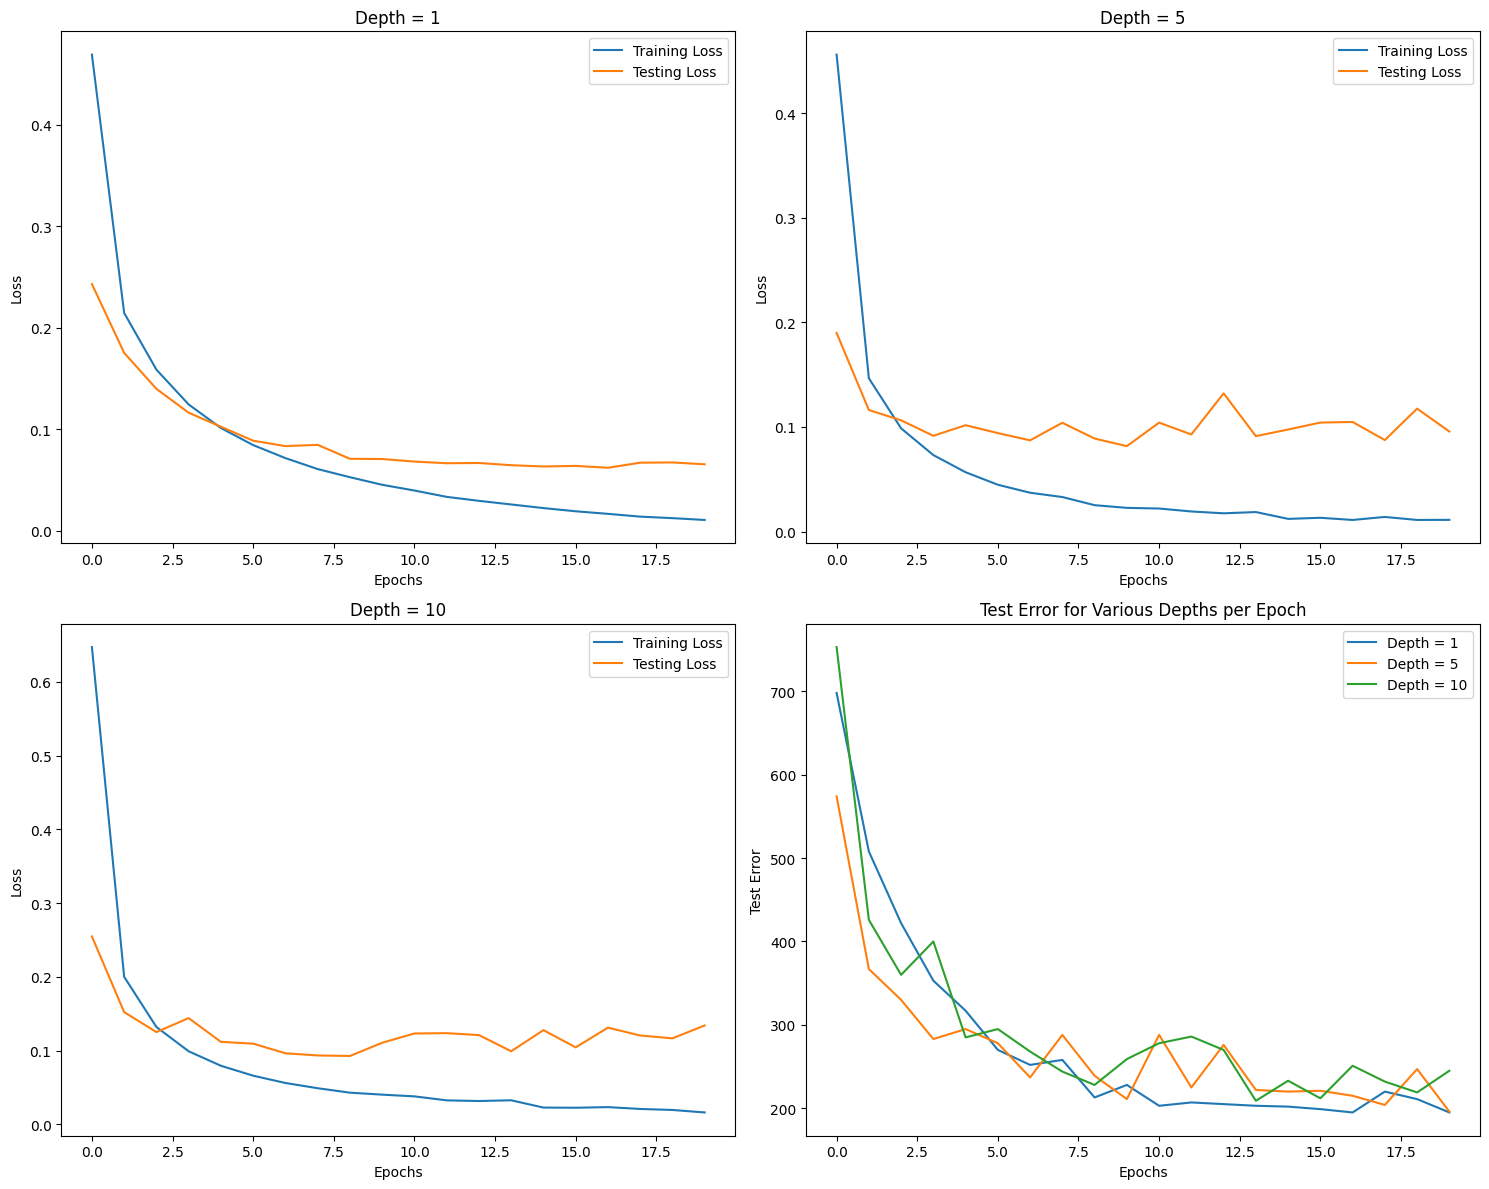

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0][0].plot(range(1,num_epochs+1), train_loss_per_epoch[0])
axes[0][0].plot(range(1,num_epochs+1), test_loss_per_epoch[0])
axes[0][0].set_title('Depth = 1')
axes[0][0].set_xlabel("Epochs")
axes[0][0].set_ylabel("Loss")
axes[0][0].legend(["Training Loss", "Testing Loss"])

axes[0][1].plot(range(1,num_epochs+1), train_loss_per_epoch[1])
axes[0][1].plot(range(1,num_epochs+1), test_loss_per_epoch[1])
axes[0][1].set_title('Depth = 5')
axes[0][1].set_xlabel("Epochs")
axes[0][1].set_ylabel("Loss")
axes[0][1].legend(["Training Loss", "Testing Loss"])

axes[1][0].plot(range(1,num_epochs+1), train_loss_per_epoch[2])
axes[1][0].plot(range(1,num_epochs+1), test_loss_per_epoch[2])
axes[1][0].set_title('Depth = 10')
axes[1][0].set_xlabel("Epochs")
axes[1][0].set_ylabel("Loss")
axes[1][0].legend(["Training Loss", "Testing Loss"])

axes[1][1].plot(range(1,num_epochs+1), test_error_per_epoch[0])
axes[1][1].plot(range(1,num_epochs+1), test_error_per_epoch[1])
axes[1][1].plot(range(1,num_epochs+1), test_error_per_epoch[2])
axes[1][1].set_title('Test Error for Various Depths per Epoch')
axes[1][1].set_xlabel("Epochs")
axes[1][1].set_ylabel("Test Error")
axes[1][1].legend(["Depth = 1", "Depth = 5", "Depth = 10"])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
table_1 = f"""
| Depth         | Training Loss | Test Loss |
|---------------|---------------|-----------|
| 1             | {final_train_loss[0]:.4f}        | {final_test_loss[0]:.4f}    |
| 5             | {final_train_loss[1]:.4f}        | {final_test_loss[1]:.4f}    |
| 10            | {final_train_loss[2]:.4f}        | {final_test_loss[2]:.4f}    |
"""

print(table_1)


| Depth         | Training Loss | Test Loss |
|---------------|---------------|-----------|
| 1             | 0.0108        | 0.0656    |
| 5             | 0.0112        | 0.0957    |
| 10            | 0.0163        | 0.1342    |



For the above task, I have fixed the learning rate to 0.0005 and the number of epochs to 20. I have set the batch size to 128. As the question asks, I have set the width to 256.

From the table above, we see that increasing the depth from 1 to 5 causes the training loss to go down but the test loss to go up. This is a case of overfitting, in which the model it trying to learn/gather less important trends in the data, therfore reducing the training loss, but not generalising well for unseen data. As we increase the depth to 10, the test loss increases as we would expect, however the training loss also increases. One potential reason for this can be because of vanishing gradients. As the loss wrt weights in backpropagated, the gradients might be too small, causing slower convergence.


Deeper networks have more complicated non-convex loss landscapes, therefore, it becomes difficult to optimise to the global minima. So, the algorithm might get stuck in a local minima. This might explain the high training and test losses for deeper models. To deal with this, we could try using stochastic gradient descent, as it is not fully detereministic and we might explore the loss landscape better. In the above code, we use an Adam optimiser which is meant to be a fast and robust algorithm, but it might be the case that stochastic gradient descent works better for deeper networks.

From the Depth = 5 plot, the distance between the training and test loss appears wider compared to the Depth = 1 plot. This suggests that the generalisation error is higher for a larger depth. On the Depth = 10 plot, we see that the test loss appears to be increasing after 9 epochs, reflecting in the extent of overfitting.

In [ ]:
# Task 7
# Define hyperparameters
batch_size = 64
dim = 28 * 28  # For MNIST
nclass = 10    # For MNIST
depth = 1

learning_rate = 0.001
num_epochs = 20


trainloader, testloader = loading_data(batch_size, train_set_mnist, test_set_mnist)

train_loss_2_per_epoch = [[] for i in range(9)]
test_loss_2_per_epoch = [[] for i in range(9)]
test_error_2_per_epoch = [[] for i in range(9)]
final_train_loss_2 = []
final_test_loss_2 = []

# Train and test epochs
widths = [4 * 2 ** i for i in range(9)]

counter = 0
for width in widths:

    # Define model
    net = Net(dim, nclass, width, depth)

    # Define criterion and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    print(f'Width: {width}')

    for epoch in range(num_epochs):
        train_loss = train_epoch(trainloader, net, optimizer, criterion)
        test_loss, test_err = test_epoch(testloader, net, criterion)
        print(f'Epoch: {epoch+1:03} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Error: {test_err:.4f}')

        train_loss_2_per_epoch[counter].append(train_loss)
        test_loss_2_per_epoch[counter].append(test_loss)
        test_error_2_per_epoch[counter].append(test_err)
    final_train_loss_2.append(train_loss)
    final_test_loss_2.append(test_loss)

    counter += 1


Width: 4
Epoch: 001 | Train Loss: 1.1503 | Test Loss: 0.7823 | Test Error: 2565.0000
Epoch: 002 | Train Loss: 0.7325 | Test Loss: 0.6709 | Test Error: 2111.0000
Epoch: 003 | Train Loss: 0.6574 | Test Loss: 0.6235 | Test Error: 1902.0000
Epoch: 004 | Train Loss: 0.6139 | Test Loss: 0.5907 | Test Error: 1780.0000
Epoch: 005 | Train Loss: 0.5804 | Test Loss: 0.5625 | Test Error: 1648.0000
Epoch: 006 | Train Loss: 0.5533 | Test Loss: 0.5370 | Test Error: 1559.0000
Epoch: 007 | Train Loss: 0.5333 | Test Loss: 0.5249 | Test Error: 1516.0000
Epoch: 008 | Train Loss: 0.5202 | Test Loss: 0.5133 | Test Error: 1466.0000
Epoch: 009 | Train Loss: 0.5103 | Test Loss: 0.5070 | Test Error: 1439.0000
Epoch: 010 | Train Loss: 0.5041 | Test Loss: 0.5033 | Test Error: 1441.0000
Epoch: 011 | Train Loss: 0.4989 | Test Loss: 0.5034 | Test Error: 1441.0000
Epoch: 012 | Train Loss: 0.4943 | Test Loss: 0.4991 | Test Error: 1412.0000
Epoch: 013 | Train Loss: 0.4903 | Test Loss: 0.4960 | Test Error: 1397.0000
Epo

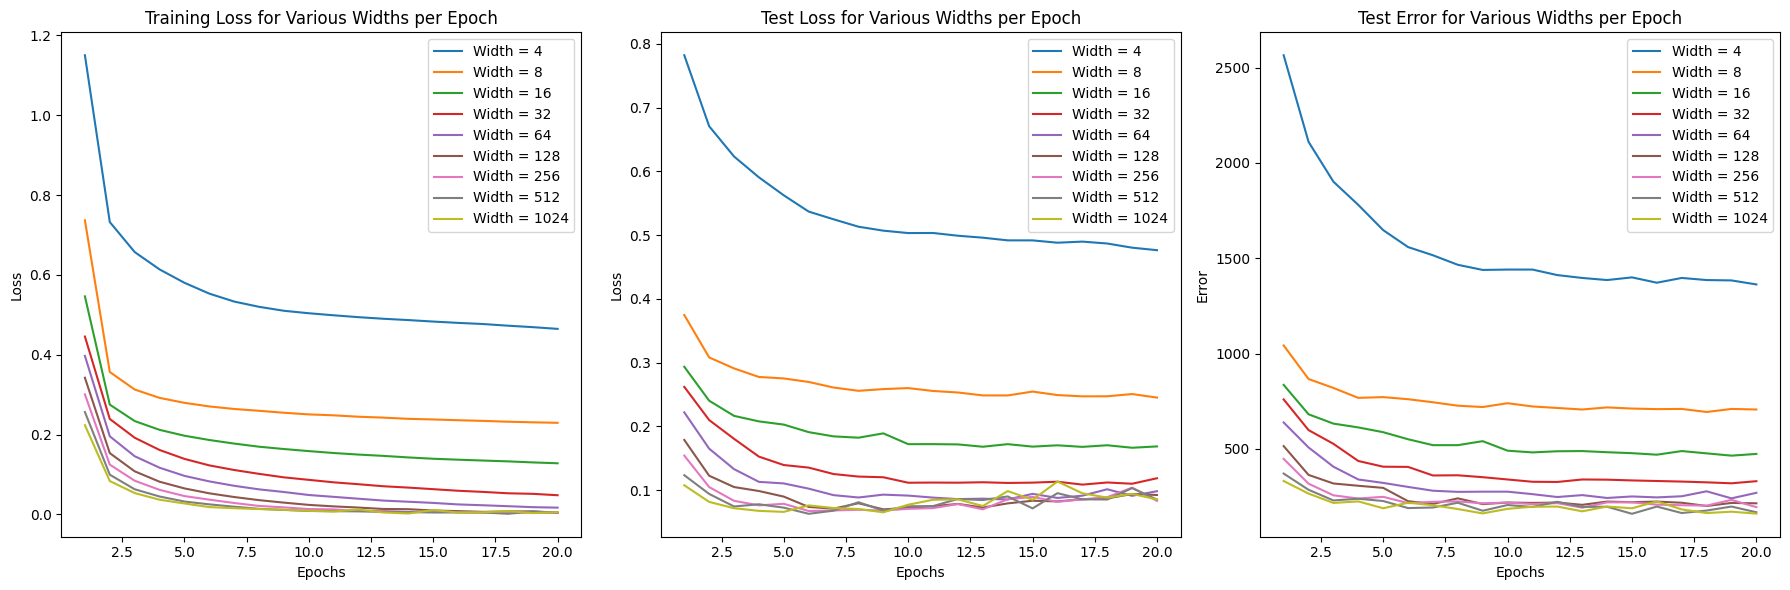

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for loss in train_loss_2_per_epoch:
    axes[0].plot(range(1,num_epochs+1), loss)
axes[0].set_title('Training Loss for Various Widths per Epoch')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend(["Width = 4", "Width = 8", "Width = 16", "Width = 32", "Width = 64", "Width = 128", "Width = 256", "Width = 512", "Width = 1024"])

for loss in test_loss_2_per_epoch:
    axes[1].plot(range(1,num_epochs+1), loss)
axes[1].set_title('Test Loss for Various Widths per Epoch')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend(["Width = 4", "Width = 8", "Width = 16", "Width = 32", "Width = 64", "Width = 128", "Width = 256", "Width = 512", "Width = 1024"])

for error in test_error_2_per_epoch:
    axes[2].plot(range(1,num_epochs+1), error)
axes[2].set_title('Test Error for Various Widths per Epoch')
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Error")
axes[2].legend(["Width = 4", "Width = 8", "Width = 16", "Width = 32", "Width = 64", "Width = 128", "Width = 256", "Width = 512", "Width = 1024"])


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
table_2 = f"""
| Width         | Training Loss | Test Loss |
|---------------|---------------|-----------|
| 4             | {final_train_loss_2[0]:.4f}        | {final_test_loss_2[0]:.4f}    |
| 8             | {final_train_loss_2[1]:.4f}        | {final_test_loss_2[1]:.4f}    |
| 16            | {final_train_loss_2[2]:.4f}        | {final_test_loss_2[2]:.4f}    |
| 32            | {final_train_loss_2[3]:.4f}        | {final_test_loss_2[3]:.4f}    |
| 64            | {final_train_loss_2[4]:.4f}        | {final_test_loss_2[4]:.4f}    |
| 128           | {final_train_loss_2[5]:.4f}        | {final_test_loss_2[5]:.4f}    |
| 256           | {final_train_loss_2[6]:.4f}        | {final_test_loss_2[6]:.4f}    |
| 512           | {final_train_loss_2[7]:.4f}        | {final_test_loss_2[7]:.4f}    |
| 1024          | {final_train_loss_2[8]:.4f}        | {final_test_loss_2[8]:.4f}    |
"""
print(table_2)


| Width         | Training Loss | Test Loss |
|---------------|---------------|-----------|
| 4             | 0.4650        | 0.4764    |
| 8             | 0.2296        | 0.2451    |
| 16            | 0.1283        | 0.1685    |
| 32            | 0.0483        | 0.1186    |
| 64            | 0.0171        | 0.0982    |
| 128           | 0.0043        | 0.0923    |
| 256           | 0.0044        | 0.0830    |
| 512           | 0.0049        | 0.0851    |
| 1024          | 0.0059        | 0.0852    |



In this task, the learning rate is fixed to 0.001, the batch size is again 64 and the number of epochs is 20. The depth of the network is set to 1. I wanted the choice of batch size being small at 64 because a smaller batch size could lead to faster convergence due to more frequent updates and also reduce generalisation error due to more noise being added. As the question asks, I have set the depth to 1.

 Looking at the training loss in the table above, we can clearly see a downward trend in the final training loss as we double the the depth. This is because when the width is smaller, the weights of the network are relatively larger, and when updated, they can explode causing high training loss. Test loss also goes down steadily but at a depth of 512 and 1024, both the test loss and train loss increase by small amounts. One possible reason for this could be that the increased width has overestimated the complexity of the data distribution, which has led to poor performance. Intoducing too many weights will cause the network to learn the same/similar patterns of the underlying data distribution several times, introducing bias in the mdoel.

 From the second plot (Test Loss for Various Widths per Epoch), we see that the test loss for wider networks is quite erratic for the epochs toward the end. This is due to overfitting, as the test loss is varying too much while the training loss is less erratic (first plot). The widest models are clearly not generalising well to new unseen data. From the third plot, we see that the test error for the widest models are not as erratic as the test loss. Suprisingly, the final test error for the widest model is the lowest. This could be because the decision boundaries might be captured well by the model but when the model is applied to new data, the performance is good enough that the output is inside the boundary, but still large enough to increase the test loss.

 From the table above, we can conclude that, keeping all other hyperparameters constant in this case, a width of 256 does the best in terms of test loss and is the second best in terms of the train loss. It only differs by 0.0001 for the model with the best train loss.

***
***

## Part 4: The link between Neural Networks and Gaussian Processes [8 points]

### Part 4.1: Proving the relationship between a Gaussian process and a neural network [4 points]

### Task 1: Proper weight scaling

We effectively control how much each weight contributes to the total variance. This makes sense because as we increase $N_1$, each weight should have less of an impact to maintain stability. Without proper scaling, the variance of the output may increase drastically as $N_1$ grows. This could lead to instability and divergence in the learning process, making it difficult for the network to converge to a solution.

### Task 2: Derive the GP relation for a single hidden layer

The vector representation for $f_i^{(2)}$ can be represented as
$$ f_i^{(2)} = \mathbf{w}_i^{(2)}. \mathbf{g}^{(1)} + b_i^{(2)}$$
Firstly we can see that each $f_i^{(2)}$ is the weighted sum of Gaussian random variables, where the entries of $\mathbf{g}^{(1)}$ are the weights. As each variable is centred at $0$, the $f_i^{(2)}$s themselves are centred at $0$. By CLT, as $N_1 \rightarrow \infty$, we see that $f_i^{(2)}$ converges to a $0$-mean Gaussian itself. Since the $f_i^{(2)}$ are jointly Gaussian for any set of $\mathbf{g}^{(1)}$, they are described by a Gaussian process.

$$f_i^{(2)}\sim GP(\mu^1, K^1)$$

with

$$\mu^1 = \mathbf{0}$$
$$ K^{1}_{i,i'}(x,x') = \sigma^{(2)}_w\mathbb{E}(\phi(f_i^{(1)}(x))\phi(f_{i'}^{(1)}(x') ) + \sigma^{(2)}_b$$

The covariance matrix above can be obtained as follows. Due to the mean of the Gaussian process being 0,

$$\mathbb{E}(f_i^{(2)}(x)f_{i'}^{(2)}(x')) - \mathbb{E}(f_i^{(2)}(x))E(f_{i'}^{(2)}(x') = \mathbb{E}(f_i^{(2)}(x)f_{i'}^{(2)}(x'))$$

As the weights and bias terms are i.i.d., we can separate them.
Using the equation for $f_i^{(2)}$, we have

$$ \mathbb{E}(f_i^{(2)}(x)f_{i'}^{(2)}(x'))= \mathbb{E}\left(\left(\sum_{j=1}^{N_1}w_{ij}^{(2)}g_j^{(1)}(x)\right)\left(\sum_{j=1}^{N_1}w_{i'j}^{(2)}g_j^{(1)}(x')\right)\right) + \mathbb{E}(b_i^{(2)})\mathbb{E}\left(\sum_{j=1}^{N_1}w_{ij}^{(2)}g_j^{(1)}(x)\right)+ \mathbb{E}(b_i^{(2)})\mathbb{E}\left(\sum_{j=1}^{N_1}w_{i'j}^{(2)}g_j^{(1)}(x')\right) + \mathbb{E}((b_i^{(2)})^2)$$

In the first term in the RHS, only when the $j^{th}$ term from the first bracket is multiplied with the $j^{th}$ term in the second bracket, they expectation is non-zero. Expanding the brackets inside the expectation, we realise that the terms that contain $w_{ij}^{(2)}w_{ij'}^{(2)}$ for $j \neq j'$ go to $0$ because the $w_{ij}^{(2)}$ are distributed i.i.d with $0$ mean. The second and third term in the RHS come from the fact that the biases are independent of the weights and both terms cancel as $\mathbb{E}(b_i^{(2)})=0$. Therefore, we are left with

$$  \mathbb{E}(f_i^{(2)}(x)f_{i'}^{(2)}(x'))= \mathbb{E}\left(\sum_{j=1}^{N_1}w_{ij}^{(2)}w_{i'j}^{(2)}g_j^{(1)}(x)g_j^{(1)}(x') \right) + \sigma^{(2)}_b$$

Again, only when $i=i'$, the expectation is non-zero for the same reason of the weights being i.i.d variables. Therefore, $K^1$ is a diagonal matrix with entries

$$  \mathbb{E}(f_i^{(2)}(x)f_{i}^{(2)}(x'))= \mathbb{E}\left(\sum_{j=1}^{N_1}(w_{ij}^{(2)})^2g_j^{(1)}(x)g_j^{(1)}(x') \right) + \sigma^{(2)}_b$$
$$\implies  \mathbb{E}(f_i^{(2)}(x)f_{i}^{(2)}(x'))= \sum_{j=1}^{N_1}\mathbb{E}\left((w_{ij}^{(2)})^2(g_j^{(1)}(x)g_j^{(1)}(x'))\right) + \sigma^{(2)}_b$$

$$ \implies  \mathbb{E}(f_i^{(2)}(x)f_{i}^{(2)}(x'))= \sum_{j=1}^{N_1}\frac{\sigma_w^{(2)}}{N_1}\mathbb{E}(g_j^{(1)}(x)g_j^{(1)}(x'))  + \sigma^{(2)}_b$$
$$ \implies  \mathbb{E}(f_i^{(2)}(x)f_{i}^{(2)}(x'))= \sigma_w^{(2)}\mathbb{E}(g_i^{(1)}(x)g_i^{(1)}(x'))  + \sigma^{(2)}_b$$

giving the required result.

Reference: https://arxiv.org/pdf/1711.00165.pdf



### Task 3: Why in succession

This is to make sure that the input to the layer under consideration is already governed by a Gaussian process. For an inductive argument, we assume that the $l-1$ layer is a GP as $N_{l-1}$ is a Gaussian process. To show that the $l^{th}$ layer is a GP, we use the fact that the $l-1$ layer is GP.

### Task 4: Derive the GP relation for multiple hidden layers

The proof for this is similar to the case of Task 2, which is the base case for an induction argument. Assume that $f_i^{(l-1)}$ is a Gaussian process and the $g_j^{(l-1)}$ are i.i.d. After $l-1$ steps, the network computes
$$f_i^{(l)}(x) = \sum_{j=1}^{N_l}w^{(l)}_{ij}\phi(f_j^{(l-1)}(x)) \ + \ b^{(l)}_i $$
By CLT, $w^{(l)}_{ij}$ are just i.i.d terms, it converges to a Gaussian distribution as $N_l → ∞ $ (infinite width). The $\phi(f_j^{(l-1)})$ terms are a non-linear function of the weights in layer $l-1$ are i.i.d (by induction hypothesis) and are independent of the weights and biases. As there is independence between all the terms in $f_i^{(l)}$, we can apply CLT as $N_l \rightarrow \infty$. Inductively, starting from $f_i^{(1)}$, we can show that the Gaussian process has mean $\mathbf{0}$. As before, $f_i^l(x)$ is a sum of i.i.d. random terms so that, as $N_l \rightarrow \infty$, any finite collection of $f_i^{(l)}$s will have joint multivariate Gaussian distribution and $f_i^{(l)} \sim GP \left(0, K^l\right)$.
From Task 2, the covariance is
$$ K^l_{i,i'}\left(x, x^{\prime}\right) \equiv \mathbb{E}\left[f_i^{(l)}(x) f_{i'}^{(l)}\left(x^{\prime}\right)\right]=\sigma_b^2+\sigma_w^2 \mathbb{E}\left[\phi\left(f_i^{(l-1)}(x)\right) \phi\left(f_{i'}^{(l-1)}\left(x^{\prime}\right)\right)\right]$$

By the inductive hypothesis, we know that $g_i^{(l-1)}$ is a Gaussian process with covariance matrix defined by $K^{l-1}(x, x), K^{l-1}\left(x, x^{\prime}\right), K^{l-1}\left(x^{\prime}, x^{\prime}\right)$. Therefore, the recurrence relation is given by:

$$
K^{l}\left(x, x^{\prime}\right)=\sigma_w^{(2)} F\left[K^{l-1}\left(x, x^{\prime}\right), K^{l-1}(x, x), K^{l-1}\left(x^{\prime}, x^{\prime}\right)\right]+\sigma_b^{(2)}
$$

where $F$ is some function which depends on the activation function $\phi$.

Reference: https://arxiv.org/pdf/1711.00165.pdf



***

### Part 4.2: Analysing the performance of the Gaussian process and a neural network [4 points]

In [ ]:
# Please use float64 as default dtype for this part of the assignment
torch.set_default_dtype(torch.float64)

# Another hint: when  computing [ K^L(X,X) + noise^2 Id ]^-1 y and  [ K^L(X,X) + noise^2 Id ]^-1 K^L(X,X*)
# You can TRY cholesky solve as it should be p.d. (except case for numerical errors) - maybe you can use try:/except:
# You can also try to enforce symmetry in posterior covariance by doing (K + K.t())/2

In [ ]:
# You can of course add more cells of both code and markdown.

In [ ]:
# Prepare train set
X_train = []
y_train = []
# Choose a large enough number to get 1000 samples
# (as we have a break statement, we just need the number in the range to be large)
# choose cars and deers as output
# Initialie counters for each output
c_1 = 0
c_4 = 0

for i in range(10000):
  if train_set_cifar[i][1] == 1 and c_1<501:
    X_train.append(train_set_cifar[i][0])
    y_train.append(0.5)
    c_1+=1
  if train_set_cifar[i][1] == 4 and c_4<501:
    X_train.append(train_set_cifar[i][0])
    y_train.append(-0.5)
    c_4+=1
  if len(y_train) == 1000:
    break

###Task 0:

In the above cell, the we extract only the datapoints that have a $y$ value of 1 or 4 to perform binary classification. We change the $y$ values to +0.5 or -0.5 if the original $y$ value is a 1 or 4 respectively.  As the Gaussian Process samples from a multivariate normal, we get continuous output. The decision rule is formulated as follows: if a certain prediction is greater than 0, we map the prediction to a +0.5 and if the predicition is less than 0, we map the predicition to a -0.5. If the predicition is exactly 0, we sample from a Bernoulli distribution with $p=0.5$ to obtain either a +0.5 or -0.5 with equal probability.

In [ ]:
# Task 1
def kernel_GP(L, sigma_w_sq, sigma_b_sq, X1, X2):
    M1, N0 = X1.shape
    M2, _ = X2.shape

    # Define kernel function for K0
    def K0(x, x_prime):
        return sigma_b_sq + sigma_w_sq * torch.matmul(x, x_prime.T) / N0

    # Compute kernel for K0
    KL = K0(X1, X2)
    KL_1 = K0(X1, X1)
    KL_2 = K0(X2,X2)
    # Initialize variables for recursion
    # Recursively compute kernel for each layer
    for l in range(1, L+1):
        # Compute theta for current layer
        theta_l = torch.acos(torch.clamp(KL / torch.sqrt(torch.outer(torch.diag(KL_1), torch.diag(KL_2))), min=-1, max=1))
        # Compute kernel using recurrence relation
        KL = sigma_b_sq + sigma_w_sq/(2*torch.pi) * (torch.sqrt(torch.outer(torch.diag(KL_1), torch.diag(KL_2)))) * (torch.sin(theta_l) + (torch.pi-theta_l)*torch.cos(theta_l))
        # print(KL.shape)
        KL_1 = sigma_b_sq + sigma_w_sq/(2) * (torch.sqrt(torch.outer(torch.diag(KL_1), torch.diag(KL_1))))
        KL_2 = sigma_b_sq + sigma_w_sq/(2) * (torch.sqrt(torch.outer(torch.diag(KL_2), torch.diag(KL_2))))
        # Update variables for next iteration

    return KL


In [ ]:
# Task 2
def compute_gp_posterior(X_train, y_train, X_test, sigma_noise, sigma_w_sq, sigma_b_sq, L):
    # Compute kernel matrices
    KL_train_train = kernel_GP(L, sigma_w_sq, sigma_b_sq, X_train, X_train)
    KL_train_test = kernel_GP(L, sigma_w_sq, sigma_b_sq, X_test, X_train)
    KL_test_test = kernel_GP(L, sigma_w_sq, sigma_b_sq, X_test, X_test)
    # KL_test_train = kernel_GP(L, sigma_w_sq, sigma_b_sq, X_train, X_test)

    # Compute intermediate terms
    K = KL_train_train + sigma_noise**2 * torch.eye(len(X_train))
    K_inv_y = torch.inverse(K) @ y_train
    K_inv = torch.inverse(K)

    # Compute mean of the Gaussian process posterior
    mean_posterior = KL_train_test @ K_inv_y
    # Compute covariance of the Gaussian process posterior
    cov_posterior = KL_test_test - KL_train_test @ K_inv @ KL_train_test.T

    # Make covariance matrix symmetric and positive definite
    cov_posterior = (cov_posterior + cov_posterior.T) / 2
    cov_posterior = cov_posterior + 1e-6*torch.eye(cov_posterior.size()[0])

    return mean_posterior, cov_posterior

# Example usage:
Xtrain = torch.ones(10,5)/3

Xtest = torch.ones(4, 5)/2
sigma_noise = 0.1
sigma_w_sq = 0.5
sigma_b_sq = 0.2
L = 5
ytrain = torch.ones(10)/2

KL = kernel_GP(L, sigma_w_sq, sigma_b_sq, Xtrain, Xtest)
print("Kernel Matrix:")
print(KL)
mean_posterior, cov_posterior = compute_gp_posterior(Xtrain, ytrain, Xtest, sigma_noise, sigma_w_sq, sigma_b_sq, L)
print("Mean of Gaussian process posterior:")
print(mean_posterior)
print("\nCovariance of Gaussian process posterior:")
print(cov_posterior)

Kernel Matrix:
tensor([[0.2667, 0.2667, 0.2667, 0.2667],
        [0.2667, 0.2667, 0.2667, 0.2667],
        [0.2667, 0.2667, 0.2667, 0.2667],
        [0.2667, 0.2667, 0.2667, 0.2667],
        [0.2667, 0.2667, 0.2667, 0.2667],
        [0.2667, 0.2667, 0.2667, 0.2667],
        [0.2667, 0.2667, 0.2667, 0.2667],
        [0.2667, 0.2667, 0.2667, 0.2667],
        [0.2667, 0.2667, 0.2667, 0.2667],
        [0.2667, 0.2667, 0.2667, 0.2667]])
Mean of Gaussian process posterior:
tensor([0.4982, 0.4982, 0.4982, 0.4982])

Covariance of Gaussian process posterior:
tensor([[0.0010, 0.0010, 0.0010, 0.0010],
        [0.0010, 0.0010, 0.0010, 0.0010],
        [0.0010, 0.0010, 0.0010, 0.0010],
        [0.0010, 0.0010, 0.0010, 0.0010]])


In [ ]:
# Task 3
X_test = []
y_test = []
for i in range(10000):
  if test_set_cifar[i][1] == 1:
    X_test.append(test_set_cifar[i][0])
    y_test.append(0.5)
  if test_set_cifar[i][1] == 4:
    X_test.append(test_set_cifar[i][0])
    y_test.append(-0.5)
  if len(y_test) == 1000:
    break

In [ ]:
X_train = torch.stack(X_train)
y_train = torch.tensor(y_train)
X_test = torch.stack(X_test)
y_test = torch.tensor(y_test)

# Flatten
X_train_flat = X_train.view(X_train.size(0),-1)
X_test_flat = X_test.view(X_test.size(0),-1)

In [ ]:
# Example Usage
mu, cov = compute_gp_posterior(X_train_flat, y_train, X_test_flat,0.1,1,2,9)
preds = mu.numpy()
preds[preds>0] = 0.5
preds[preds<0] = -0.5
1 - np.sum(np.abs(y_test-preds).numpy()/len(preds))

0.7830000072717667

In [ ]:
# Create grid for sigma_sq values
sigma_w_sq_vals = torch.linspace(1.5,5.5,12)
sigma_b_sq_vals = torch.linspace(0.001,0.04,12)
# Create a list of L values
L_vals = [i for i in range(1,11)]
# Initalise list for optimal parameters and corresponding accuracy
optimal_params_list = []
accuracy = {}

for L in L_vals:
    min_acc = 0
    for sigma_w_sq in sigma_w_sq_vals:
        for sigma_b_sq in sigma_b_sq_vals:
            # Computer posterior of GP
            mu, cov = compute_gp_posterior(X_train_flat, y_train, X_test_flat, 0.1,sigma_w_sq,sigma_b_sq,L)
            # Compute predictions
            preds = mu.numpy()
            preds[preds>0] = 0.5
            preds[preds<0] = -0.5
            # Create a dictionary entry with parameters and corresponding accuracy
            accuracy[f"{sigma_w_sq,sigma_b_sq,L}"] = 1 - np.sum(np.abs(y_test-preds).numpy())/len(preds)
            if accuracy[f"{sigma_w_sq,sigma_b_sq,L}"] > min_acc:
                # store accuracy and params
                min_acc = accuracy[f"{sigma_w_sq,sigma_b_sq,L}"]
                optimal_params = [sigma_w_sq,sigma_b_sq,L, min_acc]
    optimal_params_list.append(optimal_params)
    # printing L just to see how far along the grid search I am
    print(L)

1
2
3
4
5
6
7
8
9
10


In [ ]:
# Figure for Optimal Parameters with Accuaacy
print("Figure of Optimal Parameters")
df = pd.DataFrame(optimal_params_list)
df.columns = ["sigma_w_sq", "sigma_b_sq", "L", "accuracy" ]
df.round(5)

Figure of Optimal Parameters


,sigma_w_sq,sigma_b_sq,L,accuracy
0,tensor(2.9545),tensor(0.0223),1,0.901
1,tensor(2.2273),tensor(0.0045),2,0.913
2,tensor(2.2273),tensor(0.0045),3,0.920
3,tensor(2.2273),tensor(0.0116),4,0.927
4,tensor(2.2273),tensor(0.0081),5,0.926
5,tensor(2.2273),tensor(0.0081),6,0.926
6,tensor(2.5909),tensor(0.0258),7,0.927
7,tensor(2.5909),tensor(0.0223),8,0.926
8,tensor(2.9545),tensor(0.0187),9,0.926
9,tensor(2.5909),tensor(0.0045),10,0.926


We fix the noise level $\sigma$ to be 0.1. For small values of L, as we increase L, we get an increase in accuracy. After L=5, there seems to be overfitting as the accuracy on the test set stays pretty constant, but dips down slightly for large L. There seems to be a positive correlation between $\sigma^2_w$ and L. Optimal values for $\sigma^2_w$ and $\sigma^2_b$ seem to be around 2.5 and 0 resp.

In [ ]:
# Task 4
# choose best parameters from above table
mu, cov = compute_gp_posterior(X_train_flat, y_train, X_test_flat, 0.1,2.2273, 0.0116, 3)
# Find indices of 2 minimum values from covariance matrix


In [ ]:
# Find indices of 2 minimum values from covariance matrix
min_values, min_indices = torch.topk(cov.view(-1), 2, largest=False)

# Convert the flattened indices to 2D indices
min_row_indices = min_indices // cov.size(1)
topk_col_indices = min_indices % cov.size(1)

max_values, max_indices = torch.topk(cov.view(-1), 2, largest=True)

max_row_indices = max_indices // cov.size(1)
max_col_indices = max_indices % cov.size(1)


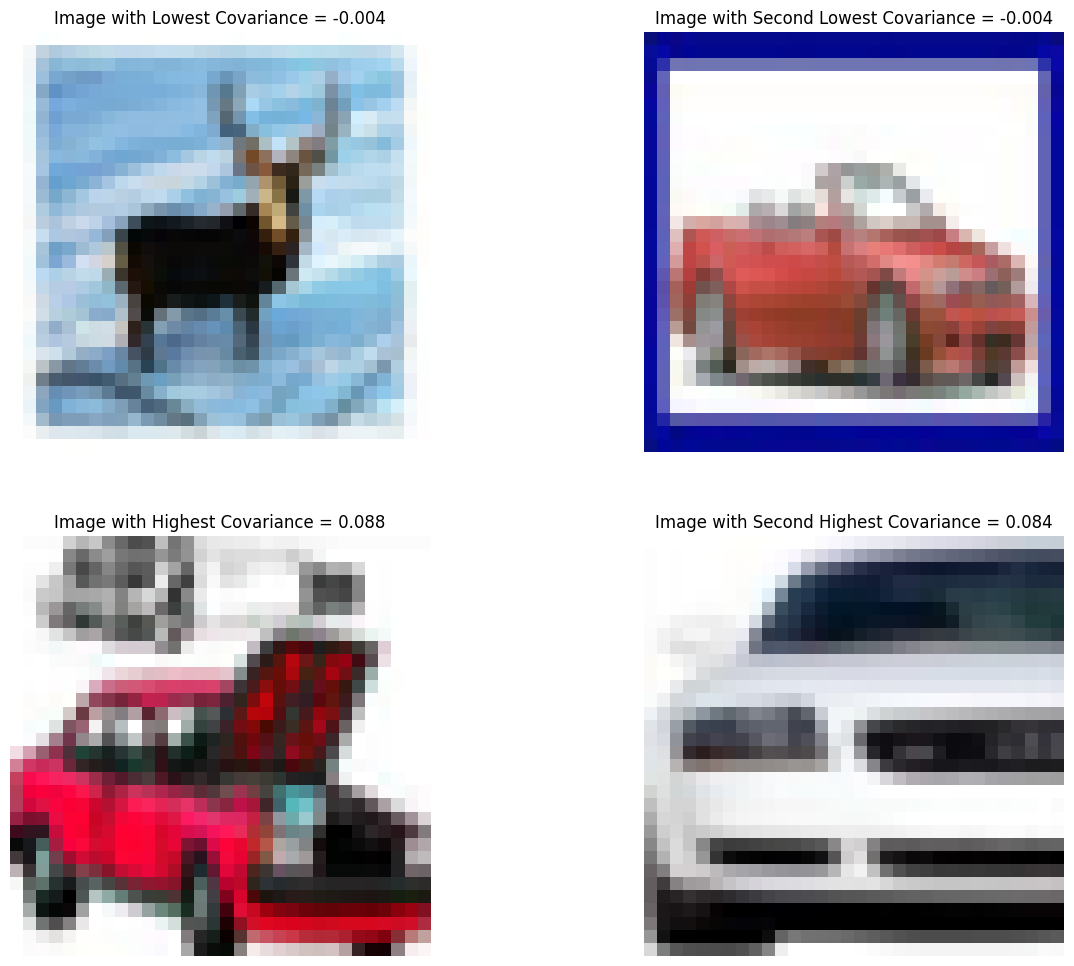

In [ ]:
# Create a grid of images from the tensor
fig, axes = plt.subplots(2, 2, figsize=(15,12))

image_min_0 = torchvision.utils.make_grid(X_test[min_row_indices[0]], nrow=2, padding=2, normalize=True).permute(1,2,0).numpy()
image_min_1 = torchvision.utils.make_grid(X_test[min_row_indices[1]], nrow=2, padding=2, normalize=True).permute(1,2,0).numpy()
image_max_0 = torchvision.utils.make_grid(X_test[max_row_indices[0]], nrow=2, padding=2, normalize=True).permute(1,2,0).numpy()
image_max_1 = torchvision.utils.make_grid(X_test[max_row_indices[1]], nrow=2, padding=2, normalize=True).permute(1,2,0).numpy()


axes[0][0].imshow(image_min_0)
axes[0][0].axis('off')
axes[0][0].set_title(f'Image with Lowest Covariance = {min_values[0]:.3f}')
axes[0][1].imshow(image_min_1)
axes[0][1].axis('off')
axes[0][1].set_title(f'Image with Second Lowest Covariance = {min_values[1]:.3f}')
axes[1][0].imshow(image_max_0)
axes[1][0].axis('off')
axes[1][0].set_title(f'Image with Highest Covariance = {max_values[0]:.3f}')
axes[1][1].imshow(image_max_1)
axes[1][1].axis('off')
axes[1][1].set_title(f'Image with Second Highest Covariance = {max_values[1]:.3f}')

plt.show()

The 2 images with the lowest covariance is an off-diagonal entry, the reason for this covariance makes sense as we have a deer and a car which are negatively correlated. Also, the backgrounds are very different.

Task 5. The bulk of the computational cost of the GP llies in inverting the matrix to find the mean and covariance of the posterior. This itself has a cost of $O(N^3)$. During prediction, computing the posterior mean and covariance for test points involves matrix multiplications and inversions. The computational cost of inverting the covariance matrix again scales cubically with the number of training data points $N$. After inverting the covariance matrix, computing the posterior mean and covariance for the training data involves matrix multiplications, which scale at $O(N^2)$. This means it becomes more infeasible to train large datasets using a Gaussian process. This is a key flaw regarding Gaussian processes. To handle large datasets more efficiently, various approximation techniques have been developed, such as sparse approximations